In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import numpy as np

In [99]:
# %pip install EconModel
from Model import ReferenceDependenceClass

In [100]:
model = ReferenceDependenceClass()

In [101]:
print(model.par.ref_income_u)


print(model.par.r_u[1])

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
0.98


In [102]:
print(model.par.r_e_future)
print(np.shape(model.par.r_e_future))

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [0.98       0.98       0.98       0.98       0.98       0.98
  0.98       0.98       0.98       0.98       0.98       0.98
  0.98       0.98       0.98      ]
 [0.96       0.96       0.96       0.96       0.96       0.96
  0.96       0.96       0.96       0.96       0.96       0.96
  0.96       0.96       0.98      ]
 [0.94       0.94       0.94       0.94       0.94       0.94
  0.94       0.94       0.94       0.94       0.94       0.94
  0.94       0.96       0.98      ]
 [0.92       0.92       0.92       0.92       0.92       0.92
  0.92       0.92       0.92       0.92       0.92       0.92
  0.94       0.96       0.98      ]
 [0.9        0.9        0.9        0.9        0.9        0.9
  0.9        0.9        0.9        0.9        0.9        0.92
  0.94       0.96       0.98      ]
 [0.88       0.88       0.88       0.88      

In [103]:
from hand_to_mouth import *

In [104]:
unemployed_ss(model.par)

(0.41099012573607546, -0.7172706216055236)

In [105]:
solve_search_effort(model.par)


(array([0.50736723, 0.4926041 , 0.47767326, 0.4631437 , 0.45014359,
        0.44081549, 0.43921844, 0.45348887, 0.50281986, 0.65743321,
        0.63148523, 0.6036663 , 0.57453393, 0.54581337, 0.52153196,
        0.51020535, 0.50331422, 0.50677278, 0.53472725, 0.63274923,
        0.61009729, 0.58617191, 0.56147416, 0.53735784, 0.51685287,
        0.50627682, 0.49537184, 0.4841419 , 0.47261332, 0.46085437,
        0.44900976, 0.43735899, 0.42641467, 0.41708925, 0.41099013,
        0.41099013]),
 array([-5.79666496, -5.49302541, -5.18587037, -4.87865498, -4.57832532,
        -4.29814443, -4.06276539, -3.91827424, -3.95622202, -4.39119816,
        -6.00499485, -5.50633059, -4.9978093 , -4.48905233, -4.0034502 ,
        -3.59096735, -3.35269306, -3.16734998, -3.10159898, -3.31375189,
        -4.31151405, -3.90531483, -3.49459806, -3.08784119, -2.70374866,
        -2.3806311 , -2.1946312 , -2.00721892, -1.8189771 , -1.63084757,
        -1.44437745, -1.26213557, -1.08840741, -0.93034803, -0.7

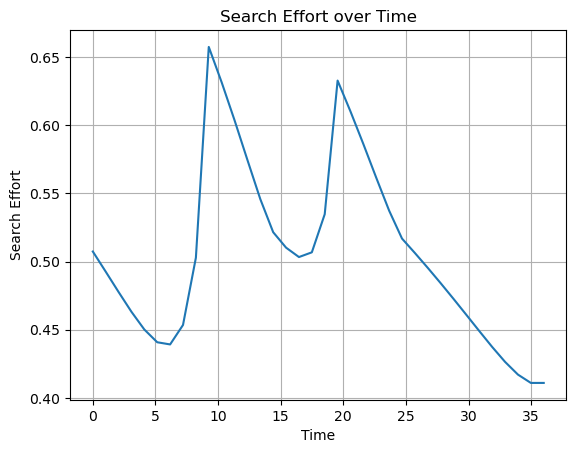

In [106]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
search_effort,value_function = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
